# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import citipy as cpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import api_keys as api_k
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import City

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = cpy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print('''Beginning Data Retrieval     
-----------------------------''')

url = "http://api.openweathermap.org/data/2.5/weather?"
record_num = 0
set_num = 1
city_info = []

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial" 
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        record_num += 1
        latitude = weather_json["coord"]["lat"]
        temperature = weather_json["main"]["temp"]
        max_temp = weather_json["main"]["temp_max"]
        min_temp = weather_json["main"]["temp_min"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        longitude = weather_json["coord"]["lon"]
        city_info.append({"Name": city, "Latitude": latitude,"Longitude": longitude, "Temperature (F)": temperature,"Maximum Temperature(F)": max_temp, "Minimum Temperature(F)": min_temp, "Humidity (%)": humidity, 
                          "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
    
    except KeyError: 
        cities.remove(city)
        record_num = 0
        set_num += 1
        print("City not found. Skipping...")
        pass
    
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Mistassini
Processing Record 2 of Set 1 | Edinburgh of the Seven Seas
Processing Record 3 of Set 1 | Hawaiian Paradise Park
Processing Record 4 of Set 1 | Torbay
Processing Record 5 of Set 1 | Yellowknife
Processing Record 6 of Set 1 | Quelimane
Processing Record 7 of Set 1 | Dunedin
City not found. Skipping...
Processing Record 1 of Set 2 | Hanga Roa
Processing Record 2 of Set 2 | Aweil
Processing Record 3 of Set 2 | Acarau
Processing Record 4 of Set 2 | Halfmoon Bay
Processing Record 5 of Set 2 | Puerto Villamil
Processing Record 6 of Set 2 | Kingston
Processing Record 7 of Set 2 | Mogadishu
Processing Record 8 of Set 2 | Severo-Kuril'sk
Processing Record 9 of Set 2 | Albany
Processing Record 10 of Set 2 | Georgetown
Processing Record 11 of Set 2 | Provideniya
Processing Record 12 of Set 2 | Happy Valley
Processing Record 13 of Set 2 | Waitangi
Processing Record 14 of Set 2 | Laguna
Processing 

Processing Record 25 of Set 27 | Verona
Processing Record 26 of Set 27 | Lompoc
Processing Record 27 of Set 27 | An Nuhud
Processing Record 28 of Set 27 | Theodore
Processing Record 29 of Set 27 | Vilyuysk
City not found. Skipping...
Processing Record 1 of Set 28 | Omsukchan
City not found. Skipping...
Processing Record 1 of Set 29 | Fayroz Koh
Processing Record 2 of Set 29 | Puerto Aysen
Processing Record 3 of Set 29 | Karlstad
Processing Record 4 of Set 29 | Bodaybo
City not found. Skipping...
Processing Record 1 of Set 30 | Kulusuk
Processing Record 2 of Set 30 | Merimbula
Processing Record 3 of Set 30 | Nordvik
Processing Record 4 of Set 30 | Sambava
Processing Record 5 of Set 30 | Bislig
Processing Record 6 of Set 30 | Ocean Shores
Processing Record 7 of Set 30 | Kleinmond
Processing Record 8 of Set 30 | Mount Gambier
Processing Record 9 of Set 30 | Balqash
Processing Record 10 of Set 30 | Santa Ana de Yacuma
Processing Record 11 of Set 30 | Tasiilaq
Processing Record 12 of Set 30

Processing Record 2 of Set 64 | Birdsville
Processing Record 3 of Set 64 | Ust'-Ordynskiy
Processing Record 4 of Set 64 | Qift
Processing Record 5 of Set 64 | Al Ghardaqah
Processing Record 6 of Set 64 | Sekondi
Processing Record 7 of Set 64 | Sawahlunto
Processing Record 8 of Set 64 | Udachnyy
Processing Record 9 of Set 64 | Manta
Processing Record 10 of Set 64 | Sumbe
Processing Record 11 of Set 64 | Nefteyugansk
Processing Record 12 of Set 64 | Ochi
Processing Record 13 of Set 64 | Cholpon-Ata
Processing Record 14 of Set 64 | Ufa
Processing Record 15 of Set 64 | Carnarvon
Processing Record 16 of Set 64 | Basseterre
Processing Record 17 of Set 64 | Sola
Processing Record 18 of Set 64 | Cacheu
Processing Record 19 of Set 64 | Anadyr
Processing Record 20 of Set 64 | Vendas Novas
Processing Record 21 of Set 64 | Guarapuava
City not found. Skipping...
Processing Record 1 of Set 65 | Faya
Processing Record 2 of Set 65 | Fuzhou
Processing Record 3 of Set 65 | Selfoss
City not found. Skippi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(city_info)

In [5]:
weather_df.to_csv("Output/cities.csv")

In [6]:
# Display the top 5-10 values of the dataframe
weather_df.head(10)

,Name,Latitude,Longitude,Temperature (F),Maximum Temperature(F),Minimum Temperature(F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Mistassini,48.89,-72.20,27.72,30.20,26.60,92,90,16.11
1,Edinburgh of the Seven Seas,-37.07,-12.31,52.56,52.56,52.56,80,18,17.13
2,Hawaiian Paradise Park,19.59,-154.97,73.42,77.00,68.00,83,90,11.41
3,Torbay,47.67,-52.73,30.16,32.00,28.40,79,40,8.05
4,Yellowknife,62.46,-114.35,8.20,8.60,8.01,84,90,16.11
5,Quelimane,-17.88,36.89,80.29,80.60,80.01,88,20,14.99
6,Dunedin,-45.87,170.50,54.00,54.00,54.00,66,18,28.99
7,Hanga Roa,-27.15,-109.43,69.80,69.80,69.80,56,75,16.11
8,Aweil,8.77,27.40,76.77,76.77,76.77,31,73,2.91
9,Acarau,-2.89,-40.12,80.71,80.71,80.71,74,92,15.75


In [7]:
# Filtering data to remove "outliers" (Values greater than 100%)
weather_df = weather_df[weather_df["Humidity (%)"] <= 100]
weather_df.head(10)

,Name,Latitude,Longitude,Temperature (F),Maximum Temperature(F),Minimum Temperature(F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Mistassini,48.89,-72.20,27.72,30.20,26.60,92,90,16.11
1,Edinburgh of the Seven Seas,-37.07,-12.31,52.56,52.56,52.56,80,18,17.13
2,Hawaiian Paradise Park,19.59,-154.97,73.42,77.00,68.00,83,90,11.41
3,Torbay,47.67,-52.73,30.16,32.00,28.40,79,40,8.05
4,Yellowknife,62.46,-114.35,8.20,8.60,8.01,84,90,16.11
5,Quelimane,-17.88,36.89,80.29,80.60,80.01,88,20,14.99
6,Dunedin,-45.87,170.50,54.00,54.00,54.00,66,18,28.99
7,Hanga Roa,-27.15,-109.43,69.80,69.80,69.80,56,75,16.11
8,Aweil,8.77,27.40,76.77,76.77,76.77,31,73,2.91
9,Acarau,-2.89,-40.12,80.71,80.71,80.71,74,92,15.75


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

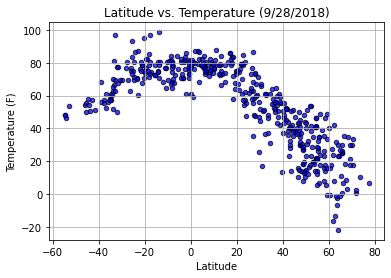

In [8]:
#Create Latitude vs. Temperature Scatter plot 
weather_df.plot.scatter(x = "Latitude", y = "Temperature (F)", color = "blue", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Temperature (9/28/2018)")
plt.savefig("Images/Latitude vs. Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

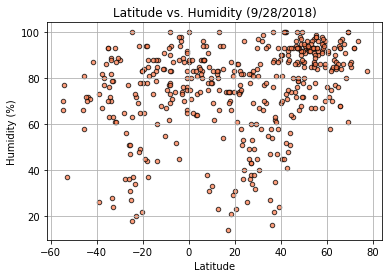

In [9]:
#Create Latitude vs Humidity scatter plot 
weather_df.plot.scatter(x = "Latitude", y = "Humidity (%)", color = "coral", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Humidity (9/28/2018)")
plt.savefig("Images/Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

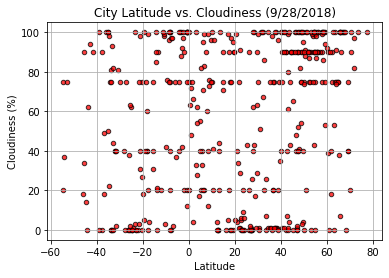

In [10]:
# Create Latitude vs. Cloudiness Plot scatter plot
weather_df.plot.scatter(x = "Latitude", y = "Cloudiness (%)", color = "red", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("City Latitude vs. Cloudiness (9/28/2018)")
plt.savefig("Images/Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

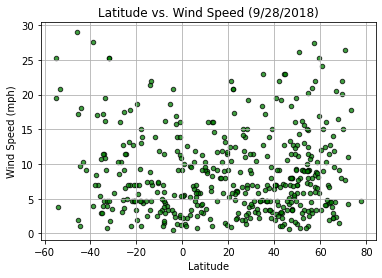

In [11]:
# Create Latitude vs. Wind Speed scatter plot
weather_df.plot.scatter(x = "Latitude", y = "Wind Speed (mph)", color = "green", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Wind Speed (9/28/2018)")
plt.savefig("Images/Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]


In [13]:
# Define function for creating linear agression and scatter plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8631681301944584


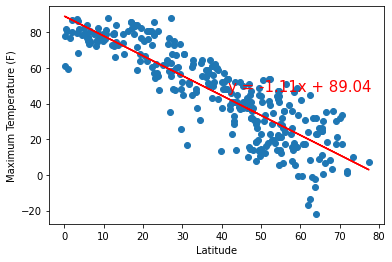

None


<Figure size 432x288 with 0 Axes>

In [14]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Maximum Temperature(F)"]
plt.ylabel("Maximum Temperature (F)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("Images/N.H Max temp vs Latitude regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6134812594233391


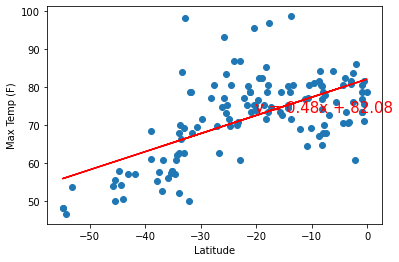

None


<Figure size 432x288 with 0 Axes>

In [15]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Maximum Temperature(F)"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("Images/S.H Max Temp vs Latitude regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31921731642968976


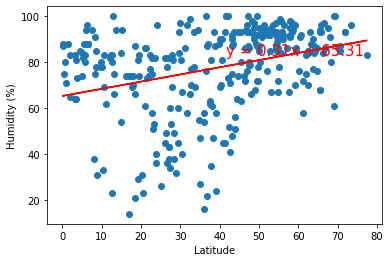

None


<Figure size 432x288 with 0 Axes>

In [16]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity (%)"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("Images/N.H Humidity vs Latitude regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23629557721872274


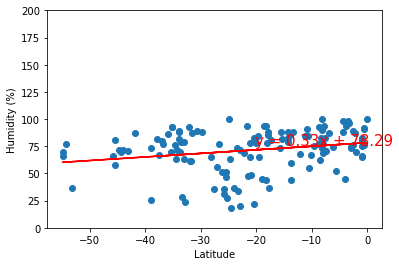

None


<Figure size 432x288 with 0 Axes>

In [17]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity (%)"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("Images/S.H Humidity vs wind speed regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3073864344739565


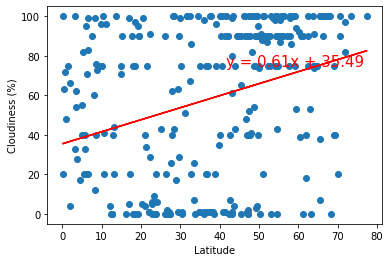

None


<Figure size 432x288 with 0 Axes>

In [18]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness (%)"]
plt.ylabel("Cloudiness (%)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("Images/N.H Cloudiness vs Latitude regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21944897361841845


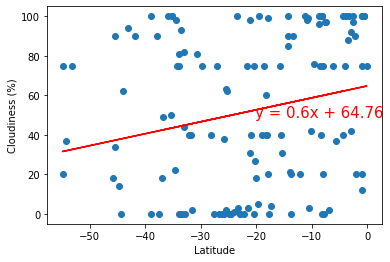

None


<Figure size 432x288 with 0 Axes>

In [19]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness (%)"]
plt.ylabel("Cloudiness (%)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("Images/S.H Cloudiness vs Latitude regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15359047330732703


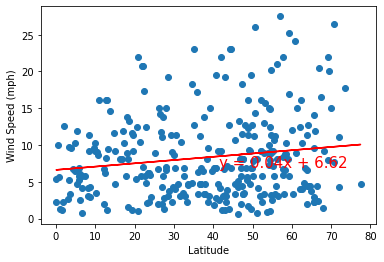

None


<Figure size 432x288 with 0 Axes>

In [20]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed (mph)"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("Images/N.H wind speed vs Latitude regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.25332010531777094


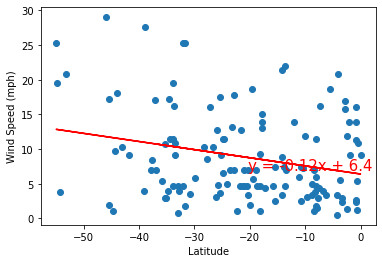

None


<Figure size 432x288 with 0 Axes>

In [21]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed (mph)"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("Images/S.H wind speed vs Latitude regression.png")